# Vectorization 

Converting Text to vector consisting of numbers.

2 words -> bigram
3 words -> tigram


Text to vectorization -> Identify all the tokens and assign one vector to the token

One of the simplest way is One Hot Encoding

# One Hot Encoding
One-hot encoding is a technique that converts categorical data into numerical data. It's used in machine learning to prepare data for algorithms and improve predictions. 

## How it works 
- Create a new binary column for each category
- Mark the presence of a category with a 1 in the corresponding column
- Mark all other categories with a 0


## In NLP
A one-hot vector is a 1 × N matrix (vector) used to distinguish each word in a vocabulary from every other word in the vocabulary

One-hot encoding ensures that machine learning does not assume that higher numbers are more important.

For example, the value '8' is bigger than the value '1', but that does not make '8' more important than '1'. The same is true for words: the value 'laughter' is not more important than 'laugh'.

## In Machine Learning
one-hot encoding is a frequently used method to deal with categorical data. Because many machine learning models need their input variables to be numeric, categorical variables need to be transformed in the pre-processing part.

Categorical data can be either nominal or ordinal.[7] Ordinal data has a ranked order for its values and can therefore be converted to numerical data through ordinal encoding.[8] An example of ordinal data would be the ratings on a test ranging from A to F, which could be ranked using numbers from 6 to 1. Since there is no quantitative relationship between nominal variables' individual values, using ordinal encoding can potentially create a fictional ordinal relationship in the data.[9] Therefore, one-hot encoding is often applied to nominal variables, in order to improve the performance of the algorithm.

### Disadvantage
Because this process creates multiple new variables, it is prone to creating a 'big p' problem (too many predictors) if there are many unique values in the original column. Another downside of one-hot encoding is that it causes multicollinearity between the individual variables, which potentially reduces the model's accuracy.

![img](https://i.sstatic.net/vhQC3.png)

# Text to sequence

Strings into list of integers

# Fit on Text
fit_on_texts used in conjunction with texts_to_matrix produces the one-hot encoding for a text
texts_to_matrix: Convert a list of texts to a matrix.

In [3]:
from keras._tf_keras.keras.preprocessing.text import Tokenizer


text=['Hello Shubhang Shubhang Hello Hi Wassup Shubhang','Shubhang is hello world']

test_tokenizer = Tokenizer()
# Building Word Index
test_tokenizer.fit_on_texts(text)

In [4]:
sequences = test_tokenizer.texts_to_sequences(text)

In [5]:
one_hot_result = test_tokenizer.texts_to_matrix(text,mode='binary')
word_index = test_tokenizer.word_index

print('Found %s unique tokens' % len(word_index))
print(word_index)

Found 6 unique tokens
{'shubhang': 1, 'hello': 2, 'hi': 3, 'wassup': 4, 'is': 5, 'world': 6}


In [6]:
one_hot_result.shape

(2, 7)

In [7]:
print(one_hot_result)

[[0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 1. 1.]]


# OOV -> Out of Vocabulary

# Pad Sequences

pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.

In [10]:
from keras._tf_keras.keras.preprocessing.sequence import pad_sequences
print(sequences)
print()
# Here you can see 000 are added to make same length
print(pad_sequences(sequences))

[[2, 1, 1, 2, 3, 4, 1], [1, 5, 2, 6]]

[[2 1 1 2 3 4 1]
 [0 0 0 1 5 2 6]]


# Latent Dim
The latent_dim (called “units” in Keras) is the width of the hidden-state vector that an LSTM carries from step to step; the larger it is, the more information the network can store and transform at each time-step. 

Latent dimensions set how much your LSTM can remember;

# Embedding Layer
An Embedding layer is a look-up table that turns each integer token into a dense, trainable vector in a lower-dimensional semantic space, letting the model work with continuous signals instead of sparse one-hot encodings. 

The number of weights in one LSTM layer grows roughly as
``
4 * units * (units + input_dim + 1)       # 4 gates, + bias  
``


# SparseCategoricalCrossentropy
SparseCategoricalCrossentropy compares each softmax vector with the integer-encoded correct word, while Adam with clipnorm=1.0 prevents exploding gradients common in RNNs.

# Dense 

Without this layer, the decoder would just output hidden states (embeddings) — but you want predicted words (from your vocabulary), so you map the hidden states to vocab probabilities using this dense+softmax.

# Adam Optimizers

Full Form -> Adaptive Moment Estimation 

Adam = Adaptive + Momentum

Adaptive learning rates:

Each weight (parameter) gets its own learning rate based on how much it's been updated before.
So if some weights need big changes, they move fast; others move slowly.

Momentum:
It also keeps a moving average of past gradients to smooth updates.
Helps escape zig-zagging paths and speeds up convergence.


Adam helps because:

It stabilizes training even when gradients are messy.
It adjusts learning rates on the fly.
It converges faster than plain SGD (Stochastic Gradient Descent).
It works out-of-the-box most of the time with default settings (1e-3 learning rate is a good default).

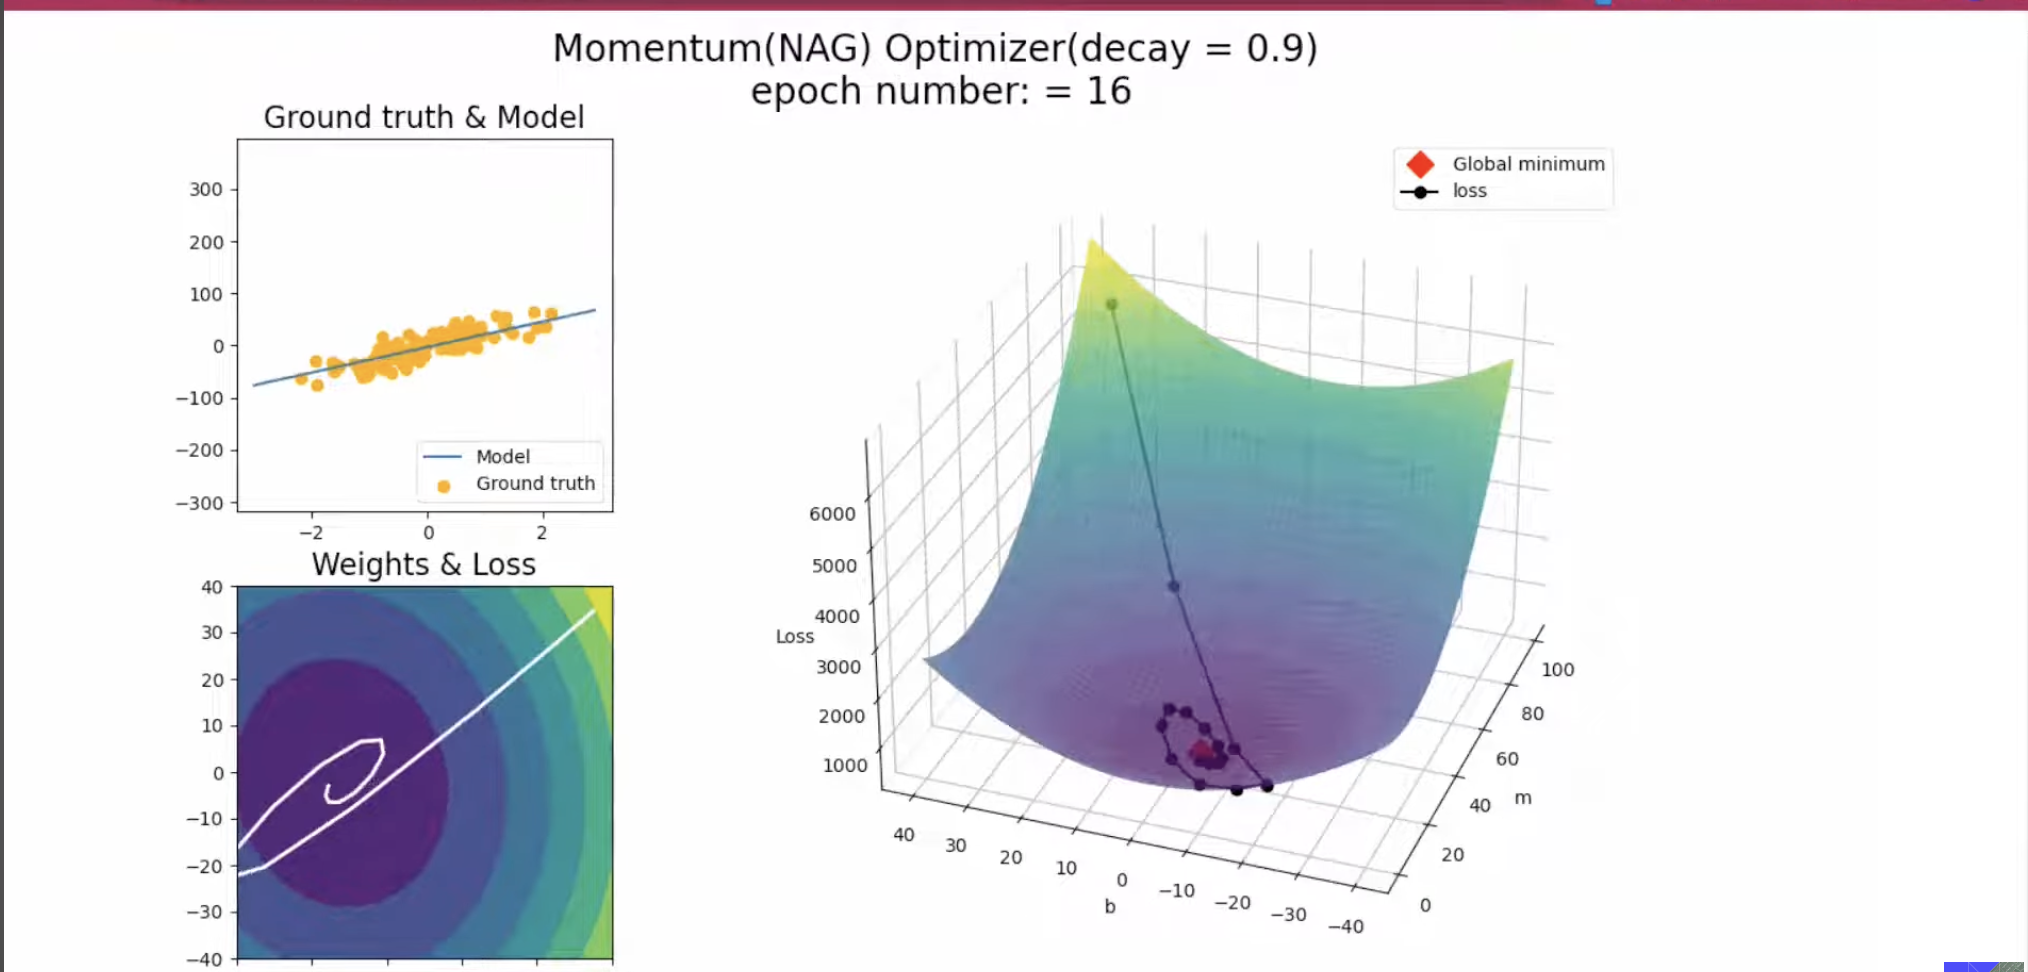](attachment:image.png)

# Momentum + Learning Rate Decay